In [41]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('ex_stock_data.csv',index_col='Date')
data = data[data['Ticker']=='TSLA']
data.head()

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2020-06-16,202.369995,202.576004,192.477997,196.425995,196.425995,70255500,TSLA
2020-06-17,197.542007,201.000000,196.514008,198.358002,198.358002,49454000,TSLA
2020-06-18,200.600006,203.839996,198.893997,200.792007,200.792007,48759500,TSLA
2020-06-19,202.556000,203.194000,198.268005,200.179993,200.179993,43398500,TSLA
2020-06-22,199.990005,201.776001,198.003998,198.863998,198.863998,31812000,TSLA


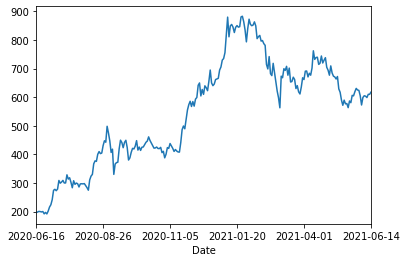

In [16]:
#plots closing prices for selected time frame
data.loc[:,'Close'].plot()

$$\textrm{Log Return} = \log{(c_{n})}-\log{(c_{n-1})} = \log{\left(\frac{c_{n}}{c_{n-1}}\right)}$$

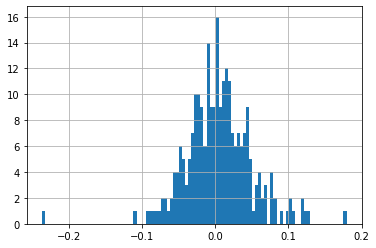

In [21]:
#compute log return
data['log_return'] = np.log(data['Close']).shift(-1) - np.log(data['Close'])
data['log_return'].hist(bins=100)

In [29]:
#build a standard normal distribution table
#density = pd.DataFrame()
#density['x'] = np.arange(-4,4,0.001)
#density['pdf'] = norm.pdf(density['x'],0,1)
#density['cdf'] = norm.cdf(density['x'],0,1)

In [35]:
#plt.plot(density['x'],density['pdf'])
#plt.plot(density['x'],density['cdf'])

In [52]:
#find mean and standard deviation of real data
mu = data['log_return'].mean()
sigma = data['log_return'].std(ddof=1)
print(mu,sigma)

0.004582803893941385 0.04711228452182538


In [53]:
#approximate density function
density = pd.DataFrame()
density['x'] = np.arange(-0.15,0.15,0.001)
density['pdf'] = norm.pdf(density['x'],mu,sigma)

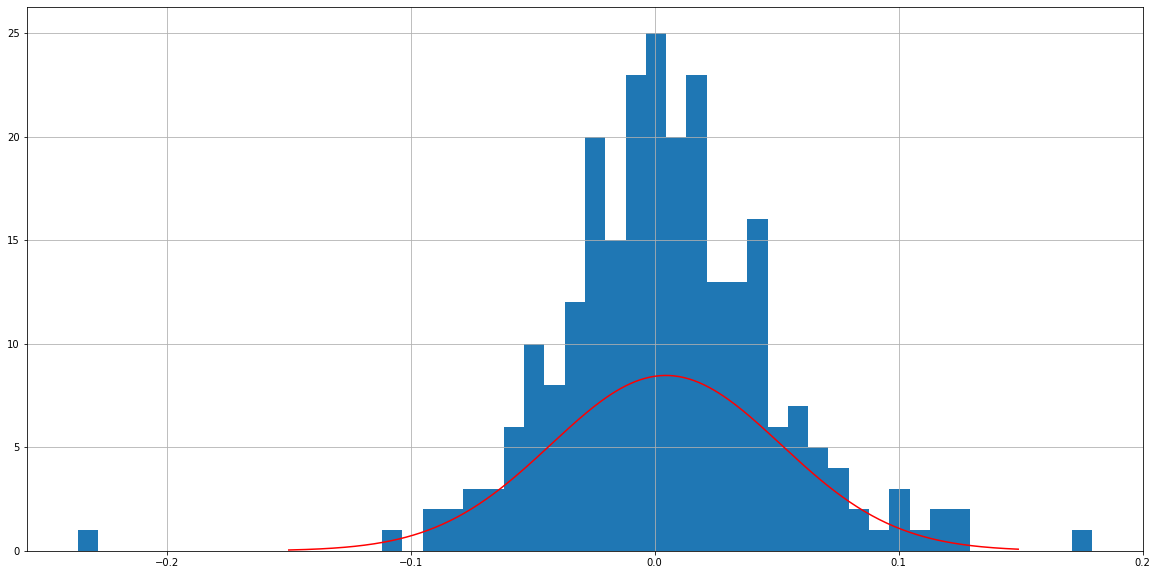

In [54]:
data['log_return'].hist(bins=50, figsize=(20,10))
plt.plot(density['x'],density['pdf'], color='red')
plt.show()

In [56]:
#calculate probability of daily loss of 5%
prob_return = norm.cdf(-0.05,mu,sigma)
print(prob_return)

0.12331607875661277


In [61]:
#calculate probability of annual loss of 10%
mu220 = 220*mu
sigma220 = (220**0.5)*sigma
norm.cdf(-0.2,mu220,sigma220)

0.04190298256968874

In [62]:
#95% value at risk (VaR), (i.e. 5th quantile)
norm.ppf(0.05,mu,sigma)

-0.07291000817575283